<center><h1>Case Study for Machine Learning Internship</h1></center>
<center><h2>-Ashish Agarwal</h2></center>
    
    
## Objective:

Scrape the customer reviews for 10 mobile phones listed on Amazon and perform Sentiment Analysis for the customer reviews.


## Procedure: 

1. Go to amazon.in and scrape the customer reviews of 100 mobile phones
2. Develop a Sentiment Analysis model using the data provided as training data
3. Using the model you developed evaluate the sentiment of the customer reviews scraped by you.


## Project Deliverables:

1. Send us a copy of the code used to scrape the customer reviews. Your case study will be evaluated on how fast your program scrapes the reviews
2. Send us the code of your Sentiment Analysis model along with EDA.
3. Submit an excel sheet with the names of all the mobile phones along with the Fine-grained sentiment analysis score of the customer reviews for all the mobile phones
4. Submit data visualizations to represent your sentiment analysis results.
5. Please make sure your code is well commented.

## Importing essential libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import json
import re
from bs4 import BeautifulSoup 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud


import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


## Data Preprocessing:

In [2]:
review_list = glob.glob("*.json")
review_list

['reviews1.json',
 'reviews10.json',
 'reviews100.json',
 'reviews11.json',
 'reviews12.json',
 'reviews13.json',
 'reviews14.json',
 'reviews15.json',
 'reviews16.json',
 'reviews17.json',
 'reviews18.json',
 'reviews19.json',
 'reviews2.json',
 'reviews20.json',
 'reviews21.json',
 'reviews22.json',
 'reviews23.json',
 'reviews24.json',
 'reviews25.json',
 'reviews26.json',
 'reviews27.json',
 'reviews28.json',
 'reviews29.json',
 'reviews3.json',
 'reviews30.json',
 'reviews31.json',
 'reviews32.json',
 'reviews33.json',
 'reviews34.json',
 'reviews35.json',
 'reviews36.json',
 'reviews37.json',
 'reviews38.json',
 'reviews39.json',
 'reviews4.json',
 'reviews40.json',
 'reviews41.json',
 'reviews42.json',
 'reviews43.json',
 'reviews44.json',
 'reviews45.json',
 'reviews46.json',
 'reviews47.json',
 'reviews48.json',
 'reviews49.json',
 'reviews5.json',
 'reviews50.json',
 'reviews51.json',
 'reviews52.json',
 'reviews53.json',
 'reviews54.json',
 'reviews55.json',
 'reviews56.json

In [3]:
all_files_dict = {v:k for v, k in enumerate(review_list, 1)}
all_files_dict

{1: 'reviews1.json',
 2: 'reviews10.json',
 3: 'reviews100.json',
 4: 'reviews11.json',
 5: 'reviews12.json',
 6: 'reviews13.json',
 7: 'reviews14.json',
 8: 'reviews15.json',
 9: 'reviews16.json',
 10: 'reviews17.json',
 11: 'reviews18.json',
 12: 'reviews19.json',
 13: 'reviews2.json',
 14: 'reviews20.json',
 15: 'reviews21.json',
 16: 'reviews22.json',
 17: 'reviews23.json',
 18: 'reviews24.json',
 19: 'reviews25.json',
 20: 'reviews26.json',
 21: 'reviews27.json',
 22: 'reviews28.json',
 23: 'reviews29.json',
 24: 'reviews3.json',
 25: 'reviews30.json',
 26: 'reviews31.json',
 27: 'reviews32.json',
 28: 'reviews33.json',
 29: 'reviews34.json',
 30: 'reviews35.json',
 31: 'reviews36.json',
 32: 'reviews37.json',
 33: 'reviews38.json',
 34: 'reviews39.json',
 35: 'reviews4.json',
 36: 'reviews40.json',
 37: 'reviews41.json',
 38: 'reviews42.json',
 39: 'reviews43.json',
 40: 'reviews44.json',
 41: 'reviews45.json',
 42: 'reviews46.json',
 43: 'reviews47.json',
 44: 'reviews48.json',


In [4]:
# Merging data from all files into a flat list.

data = []

for k,v in all_files_dict.items():
        with open(v, 'r') as d:
            json_data = json.load(d)
            if json_data:
                data.append(json_data)
                
flat_list = [item for sublist in data for item in sublist]

In [5]:
## Creating a pandas dataframe using the flat list above.

df= pd.DataFrame(flat_list, columns=['Brand', 'Model', 'stars', 'comment'])
df.head()

,Brand,Model,stars,comment
0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n At first g...
1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...
2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...
3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...
4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...


## Exploratory Data Analysis

In [6]:
df.stars.value_counts()

5.0 out of 5 stars    379
1.0 out of 5 stars    357
4.0 out of 5 stars    133
3.0 out of 5 stars     62
2.0 out of 5 stars     61
Name: stars, dtype: int64

In [7]:
## Replacing the text in the column 'stars' to required ratings integer values.

df["stars"].replace({"5.0 out of 5 stars": 5,
                     "4.0 out of 5 stars": 4,
                     "3.0 out of 5 stars": 3,
                     "2.0 out of 5 stars": 2,
                     "1.0 out of 5 stars": 1}, inplace=True)

df["stars"].value_counts()

5    379
1    357
4    133
3     62
2     61
Name: stars, dtype: int64

In [8]:
## Summarizing the data we have

print("Summary statistics of numerical features : \n", df.describe())

print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand']))))
print("\nTotal number of unique products: ", len(list(set(df['Model']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%".format(df[df['stars']==3]["comment"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%".format(df[df['stars']>3]["comment"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%".format(df[df['stars']<3]["comment"].count()/len(df)*100))

Summary statistics of numerical features : 
             stars
count  992.000000
mean     3.116935
std      1.775616
min      1.000000
25%      1.000000
50%      4.000000
75%      5.000000
max      5.000000

Total number of reviews:  992

Total number of brands:  6

Total number of unique products:  98

Percentage of reviews with neutral sentiment : 6.25%

Percentage of reviews with positive sentiment : 51.61%

Percentage of reviews with negative sentiment : 42.14%


Text(0, 0.5, 'Count')

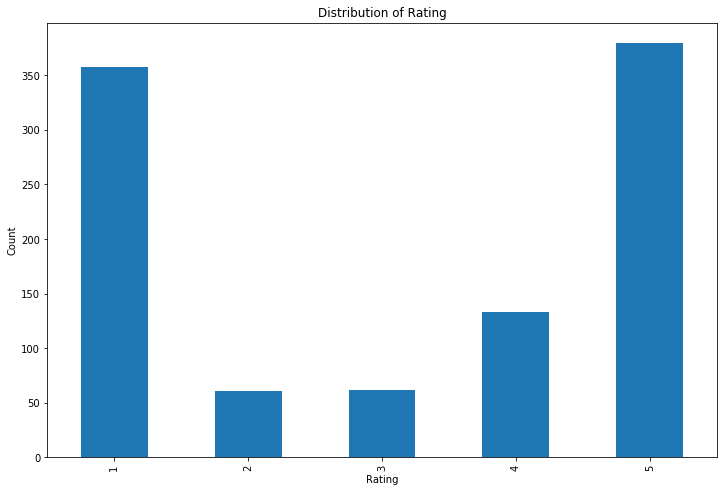

In [9]:
# Plotting distribution of rating

plt.figure(figsize=(12,8))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for different Brands')

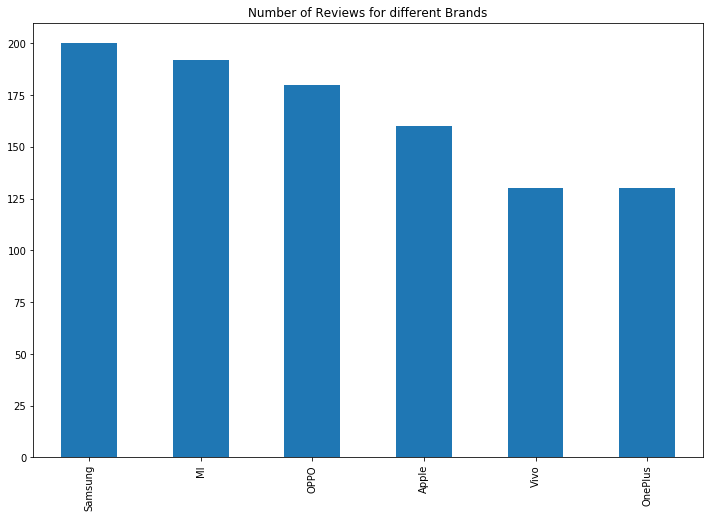

In [10]:
# Plotting  number of Reviews for different Brands

brands = df["Brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:].plot(kind='bar')
plt.title("Number of Reviews for different Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 10 Products')

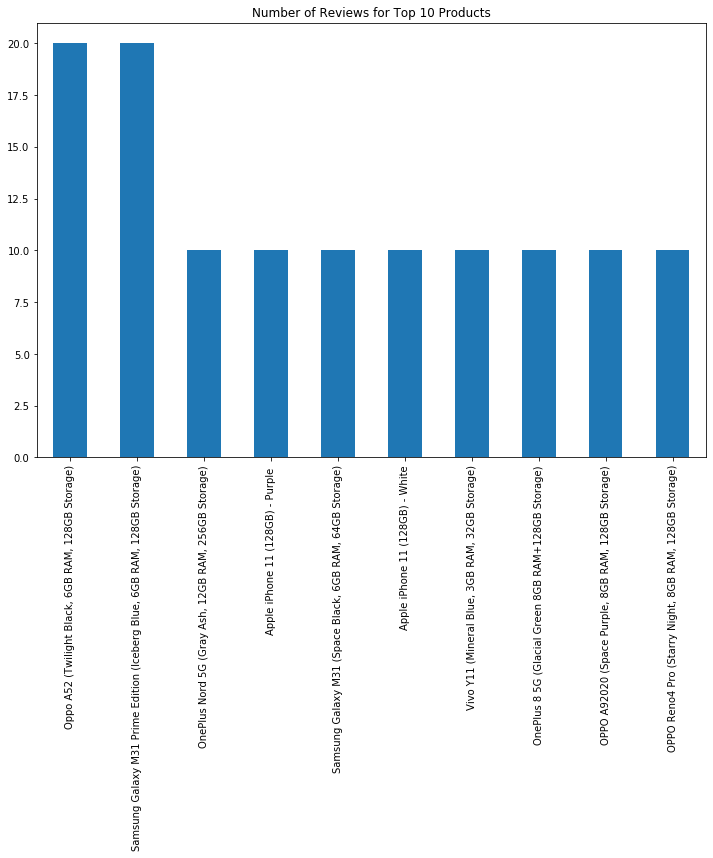

In [11]:
# Plotting number of reviews for all brands

products = df["Model"].value_counts()
plt.figure(figsize=(12,8))
products[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Products")

Text(0, 0.5, 'Count')

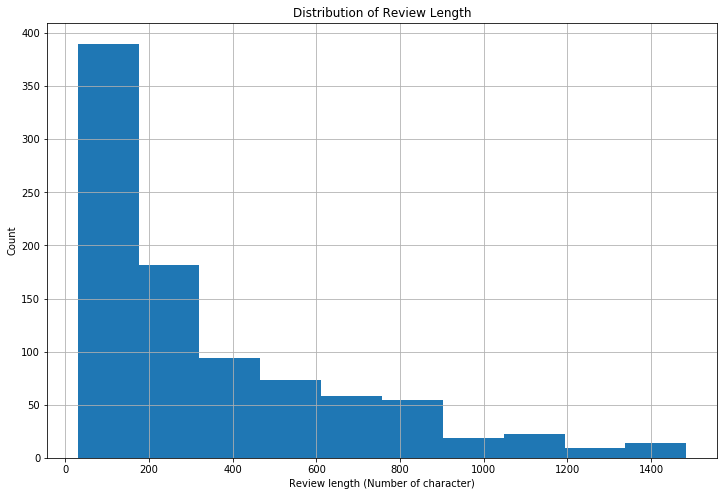

In [12]:
# Plotting distribution of review length

review_length = df["comment"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [13]:
# Dropping missing values

df.dropna(inplace=True)

# Considering reviews with positive sentiment (rating = 4, 5) and negative sentiment (rating = 1, 2)
# and dropping reviews with neutral sentiment (rating 3).

df = df[df['stars'] != 3]

# Encoding 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['stars'] > 3, 1, 0)
df.head()

,Brand,Model,stars,comment,Sentiment
0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,\n\n\n\n\n\n\n\n\n\n \n \n \n At first g...,1
1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...,0
2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...,1
3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...,0
4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...,1


In [14]:
# Spliting data into training set and validation


X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['Sentiment'], test_size=0.3, random_state=0)

print('Loading %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Loading 651 training examples and 279 validation examples. 



### Creating a Bag of Words representation and Text Preprocessing:

To classify the reviews into positive and negative sentiment, We first need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's how we're planning to dpo it.

1. Preprocess raw reviews to cleaned reviews
2. Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
3. Transform review text to numerical representations (feature vectors)
4. Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
5. Improve the model performance by GridSearch

In [15]:
# Creating a function to do text preprocessing
## 1. Remove html tags using BeautifulSoup
## 2. Remove non-character such as digits and symbols
## 3. Convert to lower case
## 4. Remove stop words such as "the" and "and" if needed
## 5. Convert to root words by stemming if needed

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    
    #removing html
    text = BeautifulSoup(raw_text, 'lxml').get_text() 
    
    # Removing non-character
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # converting to lower case
    words = letters_only.lower().split()  
    
    # Removing stopword
    if remove_stopwords: 
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    # Stemming
    if stemming==True: 
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
    
    # Spliting text    
    if split_text==True:  
        return (words)
    
    return( " ".join(words))

In [16]:
# Preprocessing text data in training set and validation set

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Showing a cleaned review in the training set : \n\n',  X_train_cleaned[1])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Showing a cleaned review in the training set : 

 very slow


In [17]:
# Fitting and transform the training data to a document-term matrix using CountVectorizer

countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier

mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 3596 

Show some feature names : 
 ['able', 'edition', 'mother', 'spigen']


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
# Defining a function check the Model Evalutaion Metrices

def modelEvaluation(predictions):
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [19]:
# Evaluating the model on validaton set

predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9140

AUC score : 0.9040

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       116
           1       0.90      0.96      0.93       163

    accuracy                           0.91       279
   macro avg       0.92      0.90      0.91       279
weighted avg       0.92      0.91      0.91       279


Confusion Matrix : 
 [[ 98  18]
 [  6 157]]


In [20]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 


tfidf = TfidfVectorizer(min_df=5) # Taking a minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

#  Instatiating and fitting Logistic Regression object

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 1242 

Show some feature names : 
 ['00', 'smart']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Looking at the top 10 features with smallest and the largest coefficients

feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'bad' 'waste' 'worst' 'defective' 'they' 'don' 'please' 'buy'
 'replacement']

Top 10 features with largest coefficients : 
['good' 'best' 'nice' 'awesome' 'love' 'super' 'great' 'superb' 'iphone'
 'value']


In [22]:
# Evaluating on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9211

AUC score : 0.9151

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       116
           1       0.92      0.95      0.93       163

    accuracy                           0.92       279
   macro avg       0.92      0.92      0.92       279
weighted avg       0.92      0.92      0.92       279


Confusion Matrix : 
 [[102  14]
 [  8 155]]


## GridSearch CV

In [23]:
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9319

AUC score : 0.9256

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       116
           1       0.92      0.96      0.94       163

    accuracy                           0.93       279
   macro avg       0.93      0.93      0.93       279
weighted avg       0.93      0.93      0.93       279


Confusion Matrix : 
 [[103  13]
 [  6 157]]


In [24]:
df_cleaned_text= pd.Series(X_train_cleaned+X_test_cleaned)
df_cleaned_text.head()

0    update never give a chance to regret go ahead ...
1                                            very slow
2    battery extremely poorcamera satisfactorylook ...
3    in my opinion don t think much about the phone...
4    never buy phone came with sim inserted used on...
dtype: object

In [25]:

df_predicted= df[['Model', 'Sentiment']]
df_predicted['Cleaned Review']= df_cleaned_text
df_predicted= df_predicted[['Model', 'Cleaned Review', 'Sentiment']]
df_predicted.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model,Cleaned Review,Sentiment
0,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",update never give a chance to regret go ahead ...,1
1,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",very slow,0
2,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",battery extremely poorcamera satisfactorylook ...,1
3,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",in my opinion don t think much about the phone...,0
4,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",never buy phone came with sim inserted used on...,1


In [26]:
# Splitting  review text into parsed sentences uisng NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

651 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['very', 'smooth', 'ui', 'latest', 'm', 'series', 'battery', 'is', 'good', 'mahit', 'has', 'dark', 'mode', 'apps', 'run', 'smoothly', 'camera', 'is', 'average', 'best', 'for', 'secondary', 'phone', 'apps', 'are', 'of', 'go', 'versionwifi', 'calling', 'feature']


In [27]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300                    
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context")

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word))
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 752 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'is', 'and', 'i', 'to', 'it', 'phone', 'a', 'for', 'in']


In [28]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
   
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [29]:
# Getting feature vectors for training set

X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set

X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


Training set : 651 feature vectors with 300 dimensions
Validation set : 279 feature vectors with 300 dimensions


In [30]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.8925

AUC score : 0.8819

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       116
           1       0.88      0.94      0.91       163

    accuracy                           0.89       279
   macro avg       0.90      0.88      0.89       279
weighted avg       0.89      0.89      0.89       279


Confusion Matrix : 
 [[ 95  21]
 [  9 154]]


In [31]:
def create_word_cloud(brand, sentiment):
    try: 
        df_brand = df.loc[df['Brand'].isin([brand])]
        df_brand_sample = df_brand.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["comment"]
            
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["comment"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

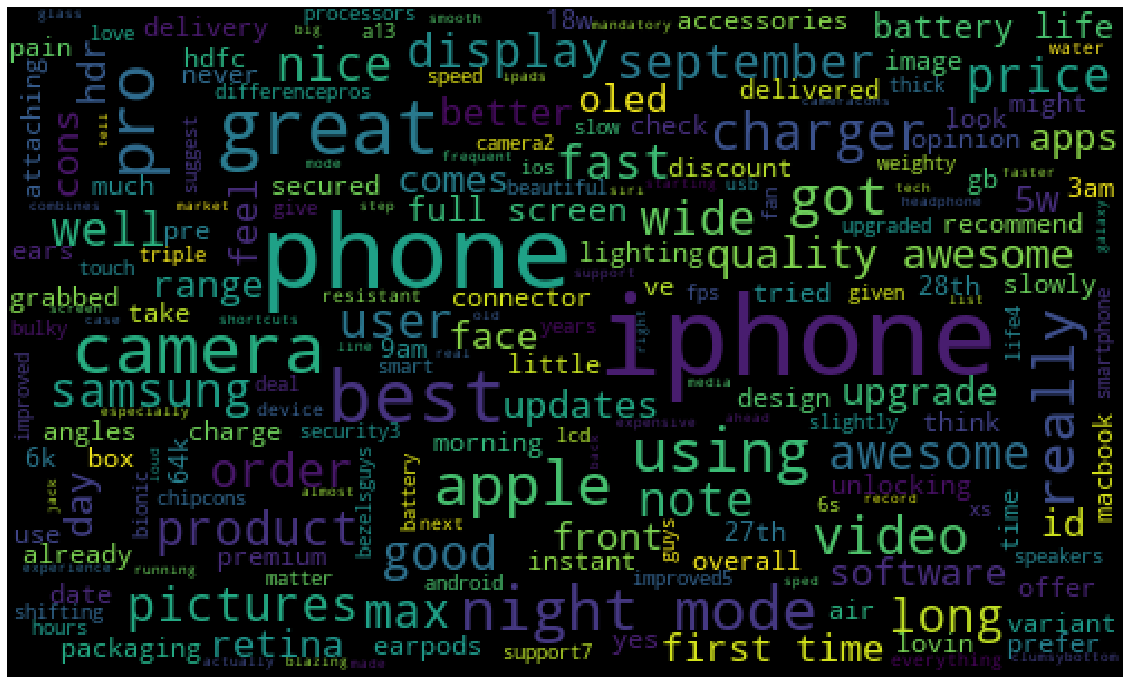

In [32]:
create_word_cloud(brand='Apple', sentiment=1)

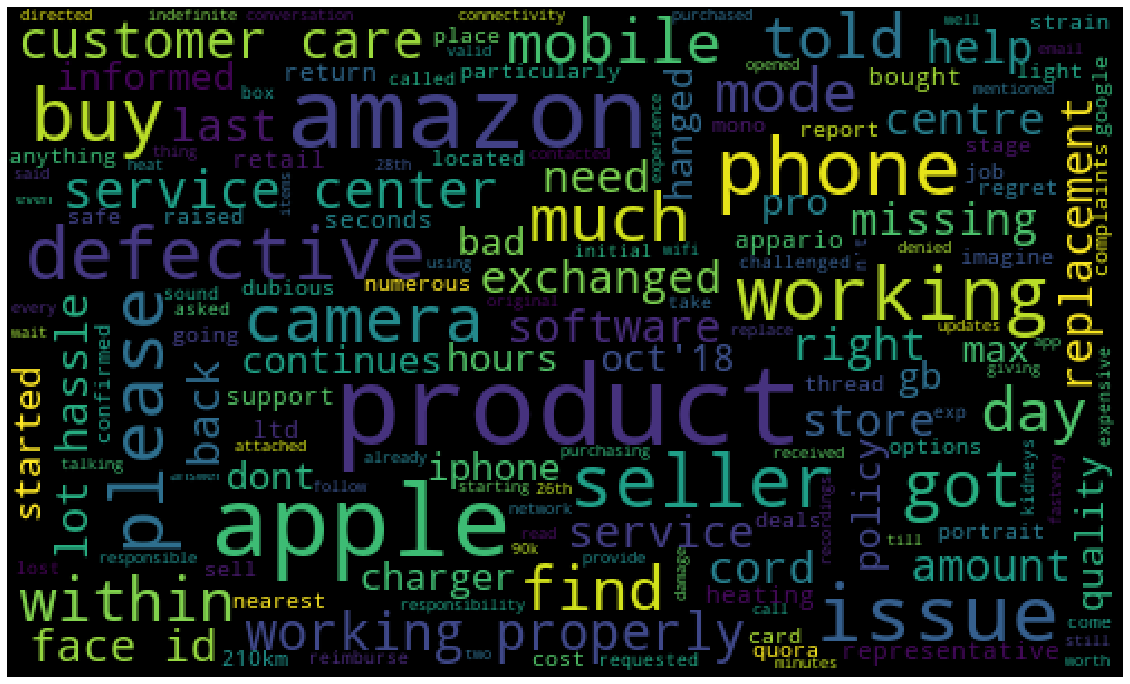

In [33]:
create_word_cloud(brand='Apple', sentiment=0)

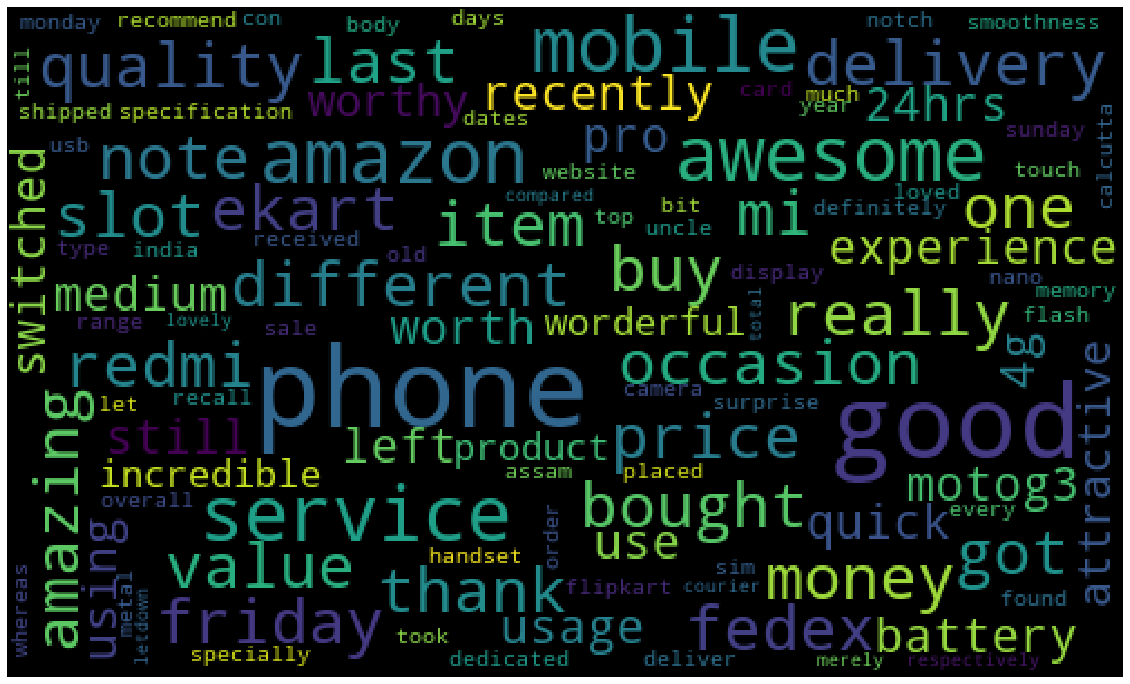

In [34]:
create_word_cloud(brand='MI', sentiment=1)

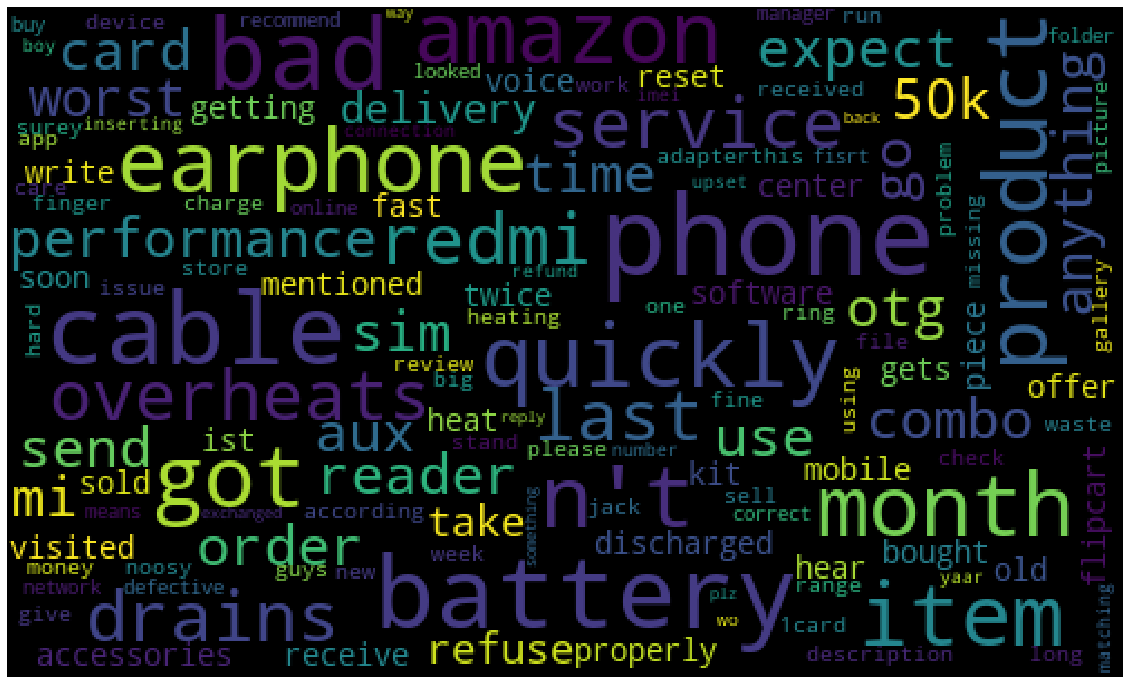

In [35]:
create_word_cloud(brand='MI', sentiment=0)

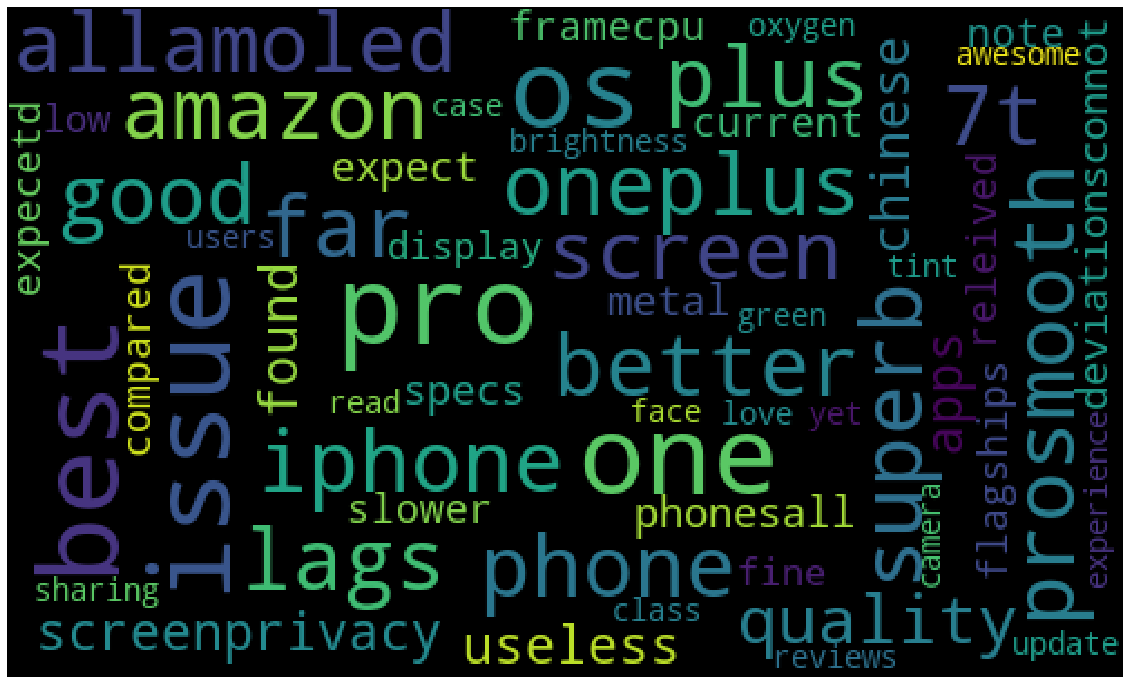

In [36]:
create_word_cloud(brand='OnePlus', sentiment=1)

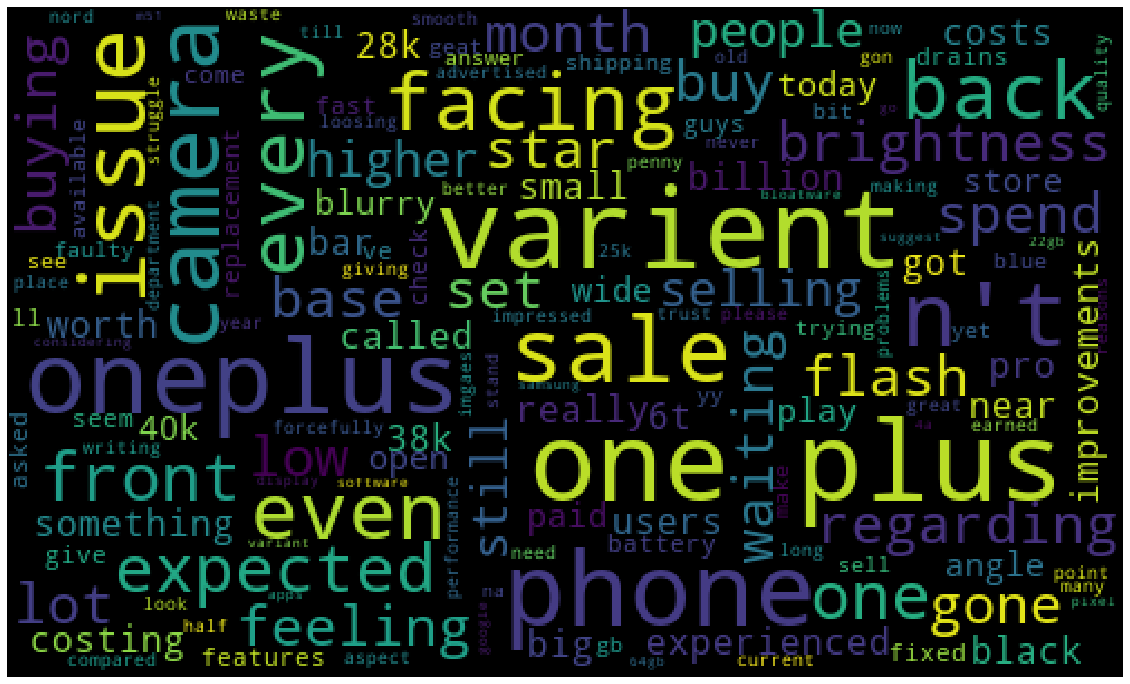

In [37]:
create_word_cloud(brand='OnePlus', sentiment=0)

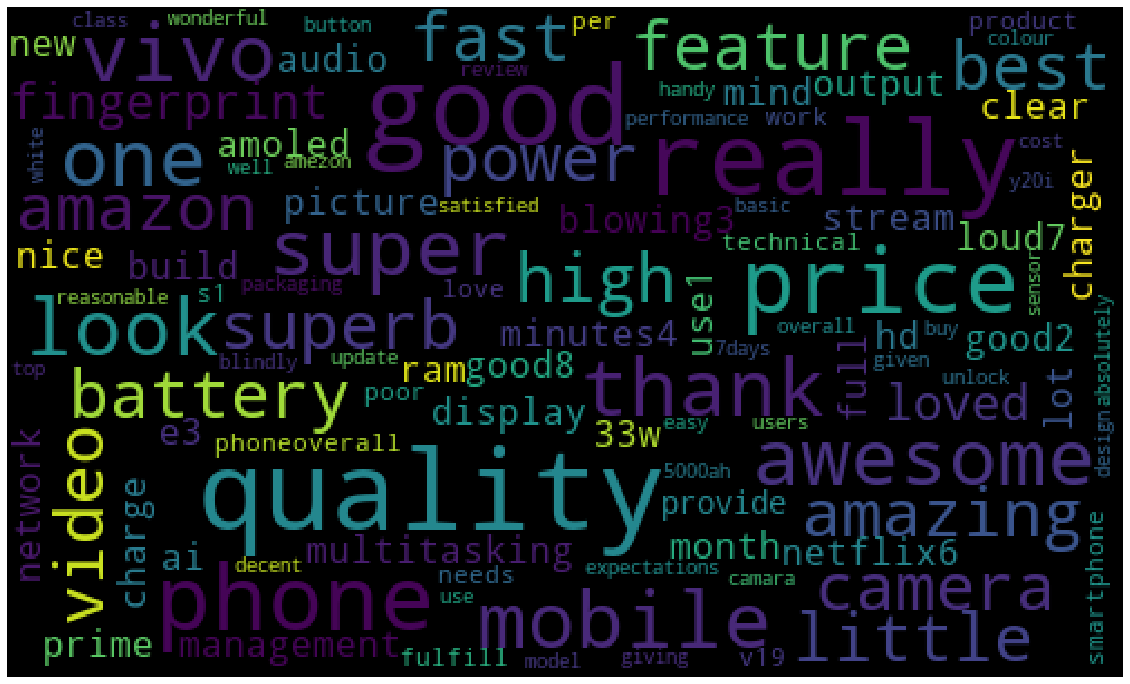

In [38]:
create_word_cloud(brand='Vivo', sentiment=1)

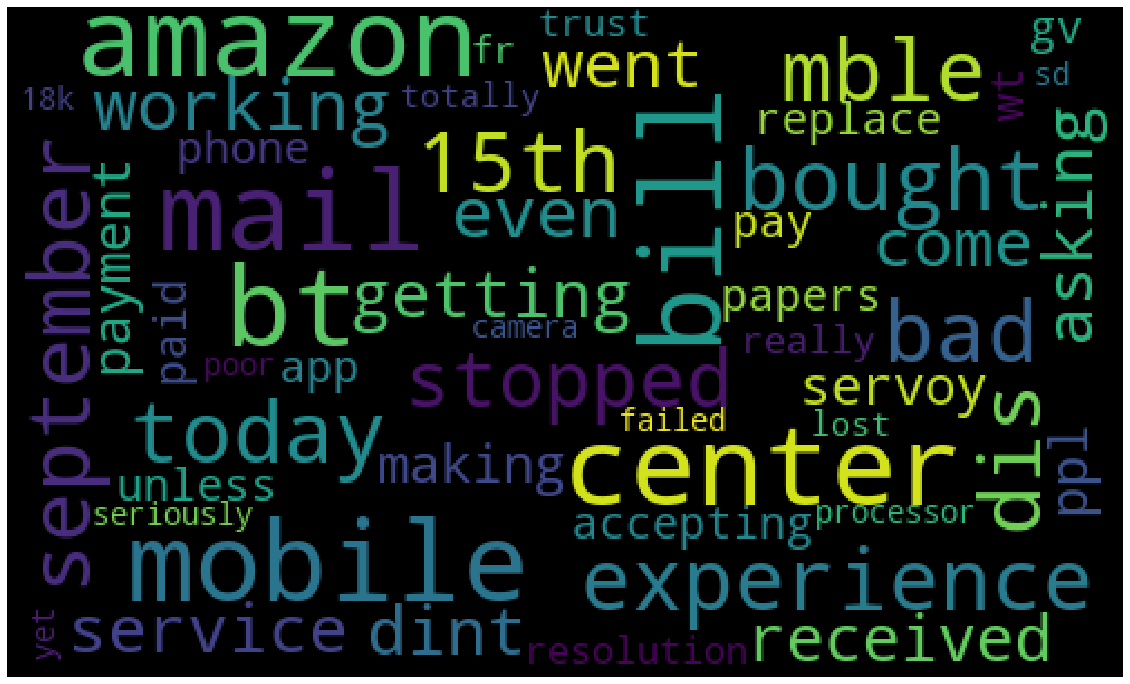

In [39]:
create_word_cloud(brand='Vivo', sentiment=0)

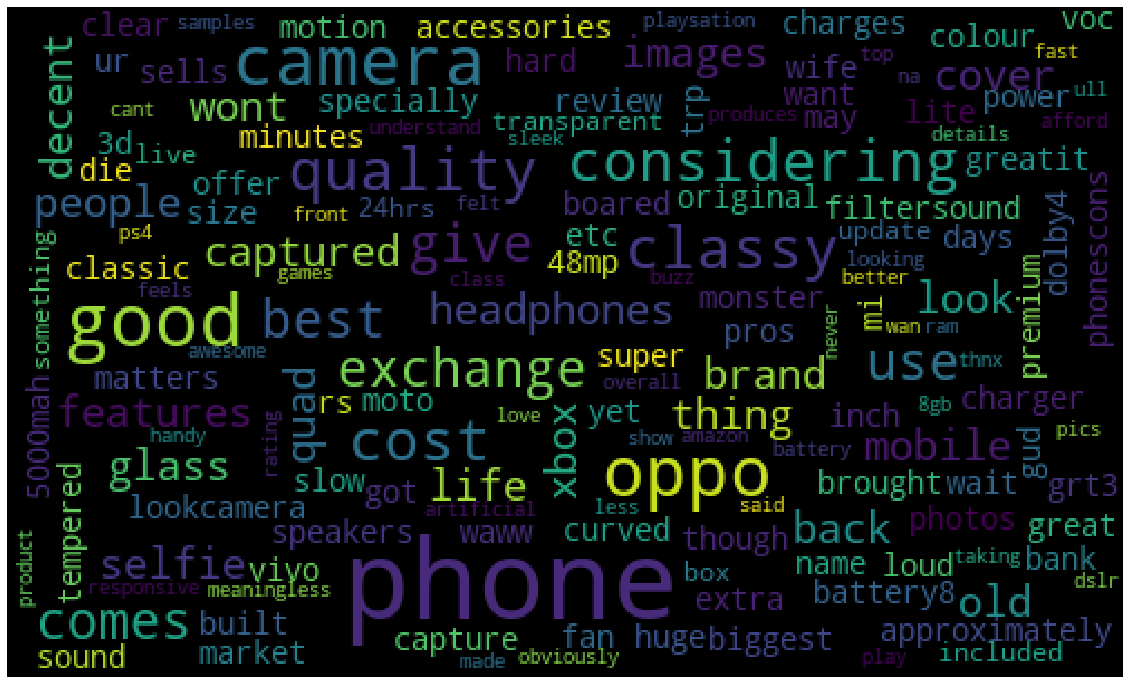

In [40]:
create_word_cloud(brand='OPPO', sentiment=1)

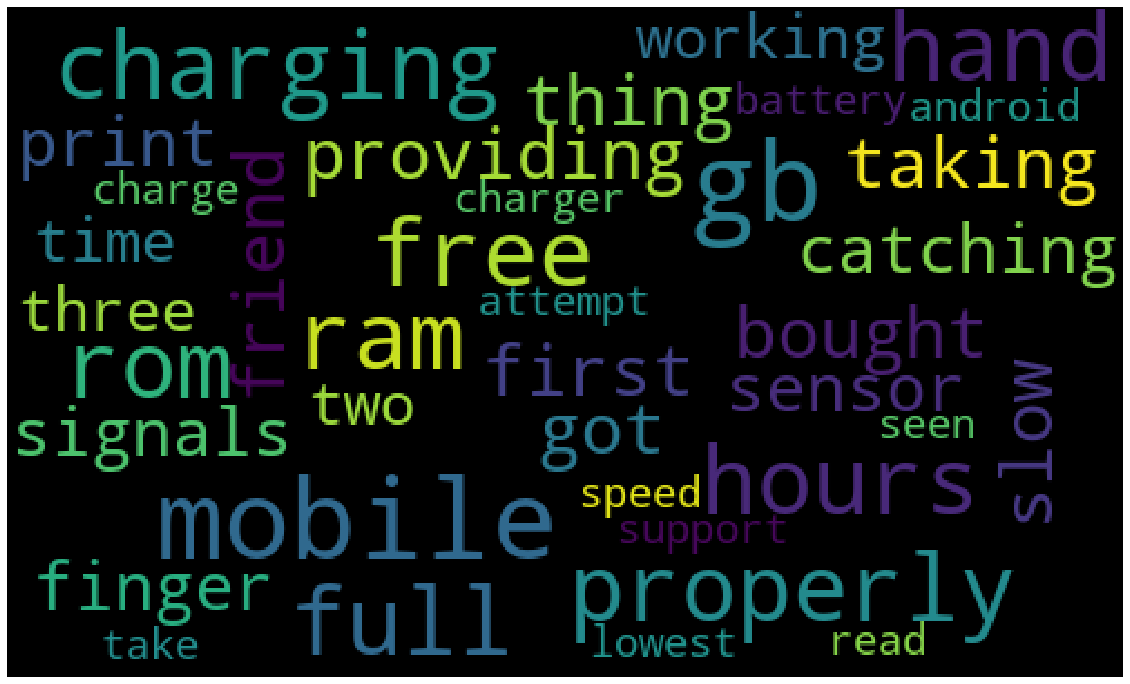

In [41]:
create_word_cloud(brand='OPPO', sentiment=0)

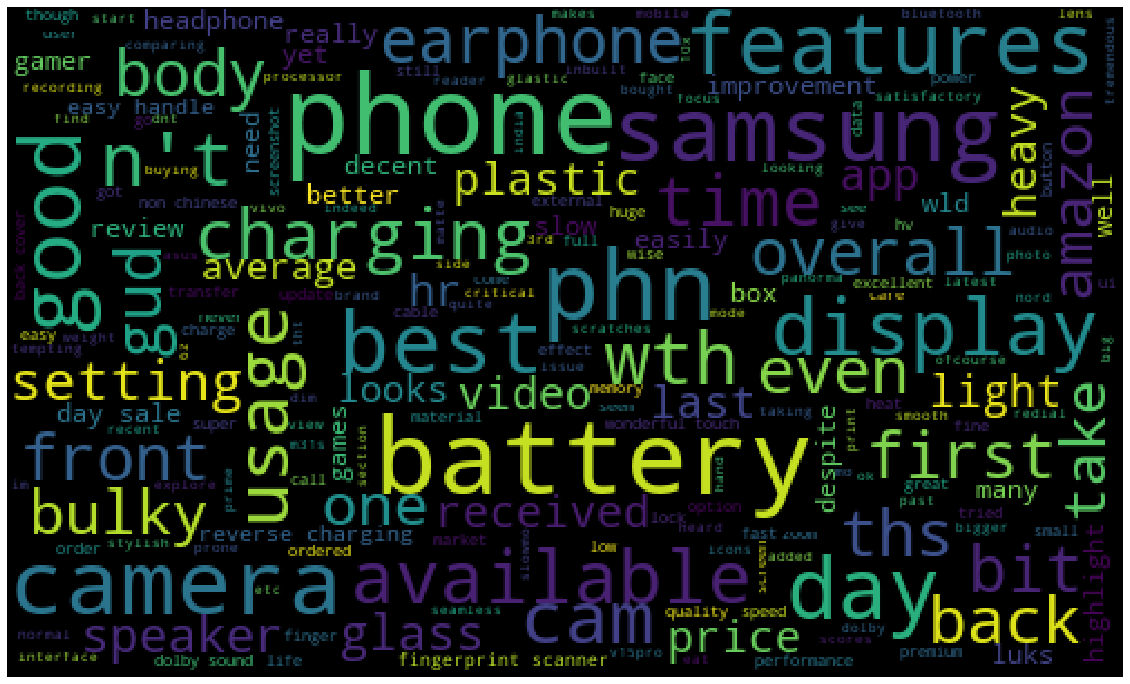

In [42]:
create_word_cloud(brand='Samsung', sentiment=1)

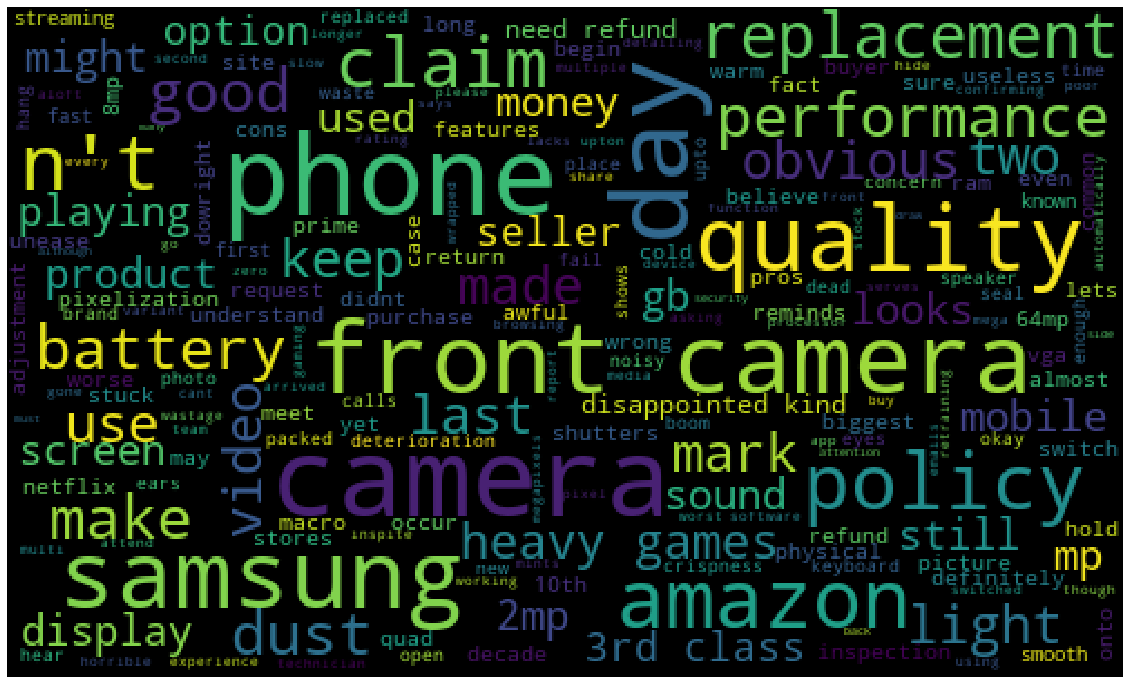

In [43]:
create_word_cloud(brand='Samsung', sentiment=0)

In [44]:
# Saving the Prediction on a CSV File

df_predicted.to_csv('Prediction.csv')